<a href="https://colab.research.google.com/github/MScEcologyAndDataScienceUCL/BIOS0032_AI4Environment/blob/main/1_Work_environment/2_Intro_to_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Our software toolset**

Python is a general programing language. This means you can make Python do anything a computer can do.

It is also a lenient and intuitive language - compared to others - and useful for fast prototyping and exploration.

Python provides a basic set of tools for code building. These are the **builtin functions**, such as `print`, and the **standard library**. With these basic tools you can build anything.

However, Python has been a popular language for decades and the wide community of its users has developed amazing tools - built upon the basic set - to help write code for many tasks. These are third-party **libraries** or **packages**, and you will find a huge variety of them, from tools to do ML, create web apps, make games, make beatiful plots, do statistics, etc.

The use of these third-party libraries is key if you wish to do complex stuff in Python **fast**. It is worthwhile to learn the tools in your programming niche. The popular libraries are generally well-writen, safe, efficient and tested, and so it is not advised to write your own solution, unless it does not exist, you have very good reasons to make a new one, or for educational purposes.

This notebook is a brief introduction to some of the libraries we will be using across these Labs. You will learn

1. How to handle file paths correctly with the standard library.
2. The basics of **numpy**, a library to accelerate scientific computation.
3. How to handle tabular data with **pandas**.
4. How to make some basic plots with **matplotlib** and **seaborn**

We cannot go deeply into any one, but we encourage you to seek out more information should you need to by looking into the documentation, tutorials or examples.

## 1. The Standard Library

The standard library is a set of tools that comes included in any Python installation. These are over 200 tools that Python developers consider essential, such as

* Exploring the filesystem
* Reading/writing in files in basic formats (such as CSV, JSON)
* Parallel computation
* Executing other programs from Python

And many others. Have a look at the [full list](https://docs.python.org/3/library/) if interested.

### `pathlib` and `os`

Handling file paths is tricky, as this is OS-dependent - simple example: Windows uses the backward slash `\`, Linux and MacOS uses the forward slash `/`.

If not careful, a Python program that runs in Windows might **break** in MacOS.

To avoid this use `pathlib` module (or the older `os` module).

In [1]:
# Import Path object from pathlib. pathlib is in the standard library and will always be available
from pathlib import Path

In [2]:
# Create a path instance pointing to a file in the colab's sample data folder
path = Path("sample_data/README.md")

In [3]:
# Print the full path
print(f"Full path: {path.resolve()}")

Full path: /content/sample_data/README.md


In [4]:
# Test if the file exist
print(f"{path.exists() = }, {path.is_file() = }, {path.is_dir() = }")

path.exists() = True, path.is_file() = True, path.is_dir() = False


In [5]:
# Get the containing directory or folder
parent_directory = path.parent
print(f"Parent directory: {parent_directory.resolve()}")

Parent directory: /content/sample_data


In [6]:
# Use path objects to navigate
other_file = (
    parent_directory / "mnist_test.csv"
)  # Get file in parent directory

# Check if you can find the mnist_test file in the 'Files' tab.
print(other_file.exists())

parent_parent_dir = parent_directory / ".."  # Go up one folder

True


In [7]:
# Create a path to a notes.txt file in the parent folder
temp_file = parent_directory / "notes.txt"

# Check it does not exist
print(f"{temp_file.exists() = }")

# Create empty file
temp_file.touch()
print(f"{temp_file.exists() = }")

# Write text to file
temp_file.write_text("Hello world!")

# Read file
with temp_file.open() as fp:
    print(fp.read())

temp_file.exists() = False
temp_file.exists() = True
Hello world!


In [8]:
# Break path into its components
full_path = path.absolute()
print(f"{full_path = }")
print(f"{full_path.name = }")
print(f"{full_path.stem = }")
print(f"{full_path.suffix = }")
print(f"{full_path.root = }")
print(f"{full_path.parent = }")
print(f"{full_path.parts = }")

full_path = PosixPath('/content/sample_data/README.md')
full_path.name = 'README.md'
full_path.stem = 'README'
full_path.suffix = '.md'
full_path.root = '/'
full_path.parent = PosixPath('/content/sample_data')
full_path.parts = ('/', 'content', 'sample_data', 'README.md')


In [9]:
# Use the os module for communication with the OS
import os

# List all files in the parent directory
print(os.listdir(parent_directory))

['README.md', 'anscombe.json', 'notes.txt', 'california_housing_train.csv', 'mnist_test.csv', 'california_housing_test.csv', 'mnist_train_small.csv']


In [10]:
# Check if file exists
if temp_file.exists():
    # And remove if it does
    os.remove(temp_file)

## 2. Numpy

Python is considered flexible and easy to write. Unfortunately, this comes at a cost as, in general, Python is not the fastest language out there.

However, you **can** get fast computation if you use the right tools. In particular, `NumPy` is a **numerical computation** library for Python that can greatly increase performance.

It is not part of the standard library, but it is so fundamental that all Python packages for scientific computing are built upon - or are compatible with - `numpy`.

Here you will learn the basics of numpy:

1. What is a numpy array?
2. How to create arrays?
3. How to do computation with arrays?

We recomend diving into the [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html) for more information.

### Numpy arrays

Numpy provides a basic data structure for efficient computation: the numpy **array**.

A numpy array is a table collection of values (usually numbers) that can be indexed by multiple non negative indices.

![numpy arrays](https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays-1024x572.png)

A graphical depiction of arrays of dimensions 1, 2 and 3

In [11]:
# Import numpy, it should be preinstalled in a colab environment.
import numpy as np  # Usually numpy is abreviated as np

In [12]:
# Numpy stores data in "arrays".
array = np.array([1, 4, 2, 0])

# Array vaues can be accesed through indices
print(array[0], array[1], array[2], array[3])

1 4 2 0


In [13]:
# Arrays can have multiple "dimensions" or "axis"
matrix = np.array([[0, 1], [-1, 1]])
print(f"{matrix.ndim = }, {matrix.shape = }")

matrix.ndim = 2, matrix.shape = (2, 2)


In [14]:
# Access array values using multiple indices
print(matrix[0, 1])

1


### Creating arrays

In [15]:
# Create array by providing its values
array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [16]:
# Create array of zeros
zeros = np.zeros([3, 3])

zeros

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [17]:
# Create an array containing a range of values
range_array = np.linspace(0, 50, 11)  # Array of values from 0 to 50 of length 11

range_array

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.])

In [18]:
# Numpy provides many random number generators
# np.random.random provides random numbers between 0 and 1.
random_array = np.random.random(size=(10, 10, 10))

### Computing with arrays

In [19]:
# Compute the minimum, maximum, mean and total sum of array values
minimum = random_array.min()
maximum = random_array.max()
mean = random_array.mean()
total_sum = random_array.sum()

print(f"{minimum = }, {maximum = }, {mean = }, {total_sum = },")

minimum = 0.0013676711347139214, maximum = 0.9998144248841617, mean = 0.4941706953048688, total_sum = 494.1706953048688,


In [20]:
# Numpy provides many common mathematical functions
x = 10

square_root = np.sqrt(x)
sine = np.sin(x)
exponential = np.exp(x)
logarithm = np.log(x)

# Apply function to each array value
np.cos(array)

array([[ 0.54030231, -0.41614684, -0.9899925 ],
       [-0.65364362,  0.28366219,  0.96017029],
       [ 0.75390225, -0.14550003, -0.91113026]])

In [21]:
# Operate arrays
y = array + np.sqrt(array)  # Sum
z = 10 * array  # Multiplication
w = z @ y  # Matrix  multiplication
u = w >= 1000  # Comparison

**Exercise**: Use google or ChatGPT to investigate how to make a histogram of the values in the `random_array`.

## 3. Pandas

**Pandas** is *the* Python library for handling **tabular data** and general **data analysis**.

The basic objects provided by pandas are the `DataFrame` and `Series`. They are tables and vectors that are also indexed by column names and row indices.

![pandas dataframe](https://pynative.com/wp-content/uploads/2021/02/dataframe.png)

Figure: Pandas table, taken from [PyNative blog entry on pandas dataframes](https://pynative.com/python-pandas-dataframe/).

In this section you will learn how to use pandas in order to:

1. Load or create a dataframe
2. Obtain basic info of a dataframe
3. Read and edit data in a dataframe
4. Filter relevant values in dataframes
5. Do computation on dataframes
6. Do aggregation on dataframes

Use the [getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/) to learn more about **pandas**.

If you are familiar with R, you will be used to handle `dataframe`s which is similar to pandas `DataFrame`. Check out this [comparison](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html) for help translating concepts into **pandas**.

### Loading or creating dataframes

In [22]:
import pandas as pd  # Pandas is usually abreviated as pd

In [23]:
numerical_column = [1, 2, 3]
categorical_column = ["a", "b", "a"]
boolean_column = [True, True, False]

# Build dataframe by specifying the column data and column names
dataframe = pd.DataFrame(
    {
        "numerical": numerical_column,
        "categorical": categorical_column,
        "boolean": boolean_column,
    },
)

dataframe

,numerical,categorical,boolean
0,1,a,True
1,2,b,True
2,3,a,False


In [24]:
# Create a csv file
csv_file = Path("table.csv")

# Write a few columns
csv_file.write_text(
    """
column_a, column_b, column_c
1.3, open, 10-01-2023
4.2, closed, 09-01-2023
-9.3, semiopen, 30-12-2022
"""
)

# Read csv with pandas
dataframe_from_csv = pd.read_csv(csv_file)

dataframe_from_csv

,column_a,column_b,column_c
0,1.3,open,10-01-2023
1,4.2,closed,09-01-2023
2,-9.3,semiopen,30-12-2022


In [25]:
# Save a dataframe to disk
dataframe.to_csv("table2.csv")

# Print the contents of the new file
print(Path("table2.csv").read_text())

,numerical,categorical,boolean
0,1,a,True
1,2,b,True
2,3,a,False



Pandas dataframes can be read and saved in many formats:
* csv
* json
* excel
* html
* ...

![pandas formats](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)

### Basic dataframe statistics

In [26]:
# Load dataframe from file on the internet
iris = pd.read_csv(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
)

In [27]:
# Show the first rows of the dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
# Describe the columns
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
# Get quick statistics on the column values
iris.describe()

# Note that only numerical columns get summarized

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
# Extract the "species" column
species = iris["species"]

In [31]:
# The "species" column is a pandas Series
print(f"type = {type(species)}")

species.head()

type = <class 'pandas.core.series.Series'>


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [32]:
# Count the number of entries per species
species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [33]:
# Get the minimum value of a column
min_sepal_length = iris["sepal_length"].min()

# The the mean value of another column
mean_petal_width = iris["petal_width"].mean()

print(
    f"Minimum sepal length = {min_sepal_length}; mean petal width = {mean_petal_width}"
)

Minimum sepal length = 4.3; mean petal width = 1.1993333333333336


In [34]:
# Note: In the background dataframe are a 2D numpy array and columns are 1D numpy arrays.
underlying_array = iris.values

print(f"type = {type(underlying_array)}, shape = {underlying_array.shape} (rows, cols)")

species_column_array = iris["species"].values

print(
    f"type = {type(species_column_array)}, shape = {species_column_array.shape} (rows,)"
)

type = <class 'numpy.ndarray'>, shape = (150, 5) (rows, cols)
type = <class 'numpy.ndarray'>, shape = (150,) (rows,)


### Accessing & editing dataframe values

In pandas dataframes each row and column has a unique identifier or index. The indices can be used to reference particular values within the dataframe.

Usually the column name is its index, and rows are indexed by the row number.

In [35]:
# Get a specific entry in the dataframe

# Get value by indices
value = iris.loc[10, "species"]  # value @ row with index 10, species column

# Get value by numerical position
value2 = iris.iloc[10, 4]  # value @ 10th row, 5th column (Python is 0-indexed)

# A combination of the previous approaches
value3 = iris["species"][10]  # 10th value in the species column

# All are equivalent ways of retrieving the same value
print(value == value2 == value3)

True


In [36]:
# Edit a single entry
iris.loc[0, "sepal_length"] = 10

# Create a new column
iris["petal_area"] = iris["petal_width"] * iris["petal_length"]

### Filtering values

In [37]:
# Check which rows have "setosa" in the species column
is_setosa = iris["species"] == "setosa"

# Select the rows for which the condition "is_setosa" is True.
filtered = iris[is_setosa]

filtered.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,10.0,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28


In [38]:
# Numerical comparisons
has_short_petal = iris["petal_length"] < 1.2

# Combine conditions
filtered = iris[is_setosa & has_short_petal]

filtered

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
13,4.3,3.0,1.1,0.1,setosa,0.11
22,4.6,3.6,1.0,0.2,setosa,0.20


### Compute on every row

In [39]:
def compute_total_area(row):
    sepal_area = row["sepal_length"] * row["sepal_width"]
    petal_area = row["petal_length"] * row["petal_width"]
    return sepal_area + petal_area

In [40]:
# Iterate over every row
total_area = 0
for index, row in iris.iterrows():
    # Sum all areas
    total_area += compute_total_area(row)

In [41]:
# Apply a function to each row, get a Series of results
iris_areas = iris.apply(compute_total_area, axis=1)

# See results
iris_areas.head()

0    35.28
1    14.98
2    15.30
3    14.56
4    18.28
dtype: float64

In [42]:
# Test if results are equal. Numerical errors might make the results slightly different,
# hence we test if they are close enough to be considered equal.
print(np.isclose(total_area, iris_areas.sum()))

True


### Grouping by values

In [43]:
# Group dataframe rows by species and compute the standard deviation of column values within each group.
iris.groupby("species").std()

,sepal_length,sepal_width,petal_length,petal_width,petal_area
species,,,,,
setosa,0.789461,0.379064,0.173664,0.105386,0.181155
versicolor,0.516171,0.313798,0.469911,0.197753,1.368403
virginica,0.635880,0.322497,0.551895,0.274650,2.157412


In [44]:
# Group dataframe by species and compute the mean total area for each group
iris.groupby("species").apply(
    lambda group: group.apply(compute_total_area, axis=1).sum()
)

species
setosa         898.32
versicolor    1112.33
virginica     1549.04
dtype: float64

## 4. Matplotlib & Seaborn

Plotting is a great tool to explore your data, validate your methods and visualize your results.

Python has many plotting libraries, but the most popular, flexible and extensive library is **matplotlib**.

In this section we will show some examples of how to use **matplotlib** for some basic plots. You will learn how to

1. Create a basic scatter and line plot
2. Adjust axis labels and figure titles
3. Creating a compound figure with multiple subplots
4. Adding text and annotations to figures

We will also see some simple examples of how to use **seaborn**, a matplotlib extension designed to facilitate plotting tabular data.

Matplotlib is a huge library with many plotting functions, and everything in the figures can be customized. If you wish to learn more we recommend the [official tutorials](https://matplotlib.org/stable/tutorials/index.html). Additionally, take a look at the [seaborn gallery](https://seaborn.pydata.org/examples/index.html) to get a quick overview of the type of plots **seaborn** can produce effortlessly.

In [45]:
import matplotlib.pyplot as plt  # This is the common way to import and abbreviate matplotlib

### Creating a simple scatter and line plot

In [46]:
# Create an independent variable, ranging from 0 to 10
x = np.linspace(0, 10, 100)

# Create a dependent variable
y = np.cos(x)

# Add some normal noise
z = y + np.random.normal(scale=0.1, size=100)

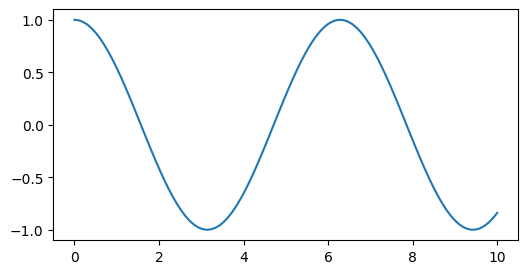

In [47]:
# Create a new figure
plt.figure(figsize=(6, 3))  # Adjust the size

# Create a line plot
plt.plot(x, y);

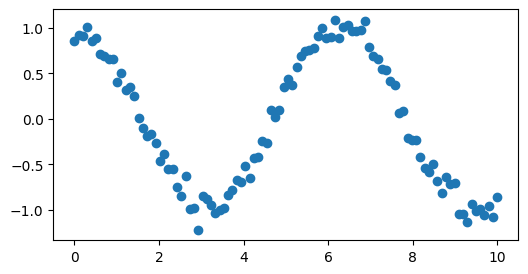

In [48]:
# Create another figure
plt.figure(figsize=(6, 3))  # Adjust the size

# Create a scatter plot
plt.scatter(x, z);

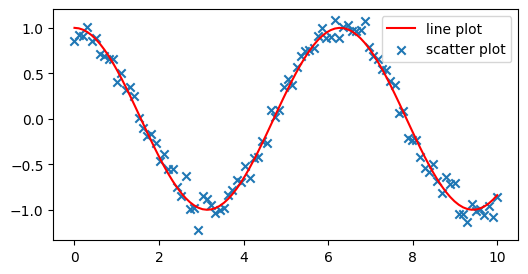

In [49]:
plt.figure(figsize=(6, 3))

# Create a red line plot.
plt.plot(x, y, label="line plot", color="red")

# Overlay the scatter plot with crosses as markers
plt.scatter(x, z, label="scatter plot", marker="x")

# Add legend to figure
plt.legend();

### Modifying titles and axes labels

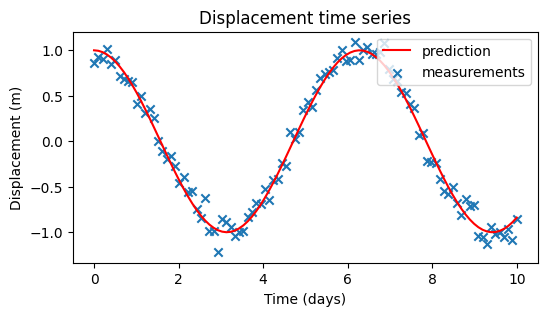

In [50]:
plt.figure(figsize=(6, 3))

# Create a red line plot.
plt.plot(x, y, label="prediction", color="red")

# Overlay the scatter plot with crosses as markers
plt.scatter(x, z, label="measurements", marker="x")

# Add legend to figure
plt.legend()

# Modify the label of the x-axis
plt.xlabel("Time (days)")

# Modify the label of the y-axis
plt.ylabel("Displacement (m)")

# Add title to the figure
plt.title("Displacement time series");

### Creating compound figure

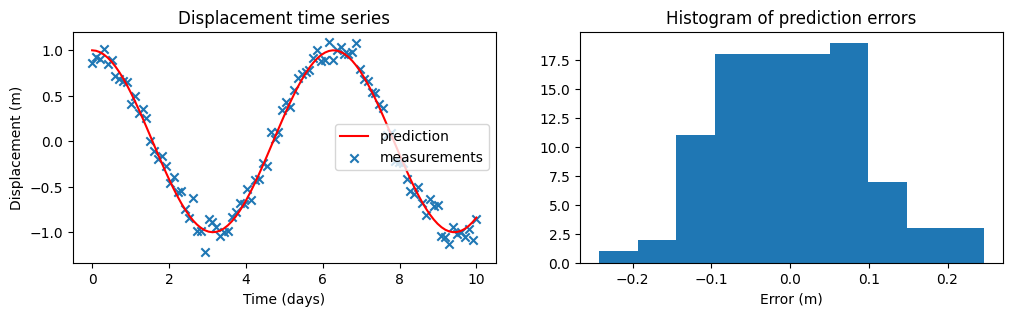

In [51]:
plt.figure(figsize=(12, 3))

# Create a 1 row, 2 column, grid of subplots and select the first subplot.
ax1 = plt.subplot(1, 2, 1)

# Create line plot in subplot
ax1.plot(x, y, label="prediction", color="red")

# Overlay the scatter plot with crosses as markers
ax1.scatter(x, z, label="measurements", marker="x")

# Add legend to figure
ax1.legend()

# Modify the label of the x-axis. Note a difference?
ax1.set_xlabel("Time (days)")

# Modify the label of the y-axis
ax1.set_ylabel("Displacement (m)")

# Add title to the figure
ax1.set_title("Displacement time series")

# Add subplot. This is the second subplot in the grid of subplots.
ax2 = plt.subplot(1, 2, 2)

# Compute the prediction error
error = z - y

# Plot a histogram of the error in the second subplot
ax2.hist(error, label="Prediction error")

# Add labels to axis
ax2.set_xlabel("Error (m)")

# Set subplot title
ax2.set_title("Histogram of prediction errors");

### Adding text

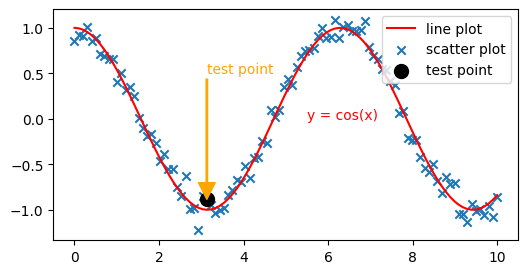

In [52]:
plt.figure(figsize=(6, 3))

# Select a single point in the data
point = x[31], z[31]

# Create a red line plot.
plt.plot(x, y, label="line plot", color="red")

# Overlay the scatter plot with crosses as markers
plt.scatter(x, z, label="scatter plot", marker="x")

# Show selected point as a large black dot
plt.scatter(
    [point[0]], [point[1]], label="test point", marker="o", s=100, color="black"
)

# Add formula for the prediction. Anchor the text at the point x= 5.5, y=0.
plt.text(5.5, 0, "y = cos(x)", color="red")

# Add text and arrow pointing to the test point
plt.annotate(
    "test point",
    point,
    xytext=[point[0], 0.5],
    color="orange",
    arrowprops={"color": "orange", "width": 1},
)

# Add legend to figure
plt.legend();

### Seaborn

Seaborn is a library for data visualization. It is built on top of matplotlib and integrates nicely with pandas.

In [53]:
import seaborn as sns

<Axes: xlabel='petal_length', ylabel='sepal_length'>

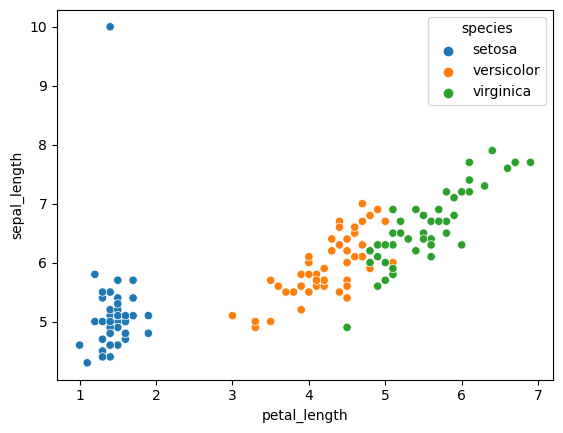

In [54]:
# Plot all datapoints in the iris dataset. Use the petal length and sepal length as x and y coordinates.
# Color the points depending on the species.
sns.scatterplot(data=iris, x="petal_length", y="sepal_length", hue="species")

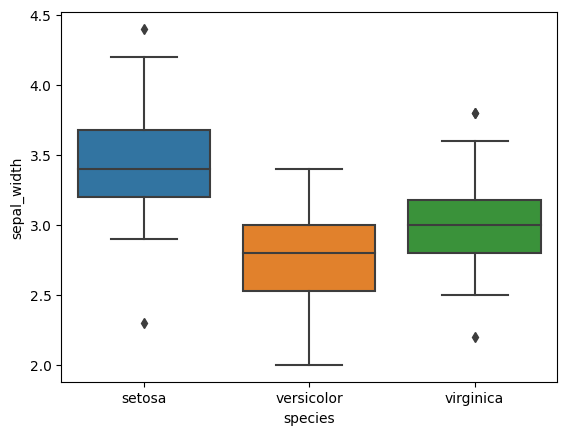

In [55]:
# Make a boxplot of the sepal width by species.
sns.boxplot(data=iris, x="species", y="sepal_width");

## 5. Exercise

![palmer penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

In this section you will download, explore and visualise the Palmer penguin dataset. This dataset contains measurements of 344 penguins collected from 3 islands in the Palmer Archipelago, Antarctica.

You can find a description of the dataset [here](https://allisonhorst.github.io/palmerpenguins/).

In [62]:
# Download the penguins csv file from
# ! wget https://vincentarelbundock.github.io/Rdatasets/csv/causaldata/avocado.csv "https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv"

! wget https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv


--2024-01-09 15:52:26--  https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19263 (19K) [text/plain]
Saving to: ‘penguins.csv.2’

penguins.csv.2      100%[===================>]  18.81K  --.-KB/s    in 0.001s  

2024-01-09 15:52:26 (13.5 MB/s) - ‘penguins.csv.2’ saved [19263/19263]



In [57]:
# Load the penguins dataframe from the downloaded csv
penguin_csv = pd.read_csv("/content/penguins.csv")

In [58]:
# Count the number of rows per year and species
penguin_csv.groupby(["year", "species"]).count()['rowid']

year  species  
2007  Adelie       50
      Chinstrap    26
      Gentoo       34
2008  Adelie       50
      Chinstrap    18
      Gentoo       46
2009  Adelie       52
      Chinstrap    24
      Gentoo       44
Name: rowid, dtype: int64

In [59]:
# Compute the mean body mass by species and sex.
penguin_csv.groupby(["species","sex"]).mean()[['body_mass_g']]

<ipython-input-59-e10689ac5aa9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  penguin_csv.groupby(["species","sex"]).mean()[['body_mass_g']]


body_mass_g
species   sex                
Adelie    female  3368.835616
          male    4043.493151
Chinstrap female  3527.205882
          male    3938.970588
Gentoo    female  4679.741379
          male    5484.836066

In [60]:
penguin_csv.head(3)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

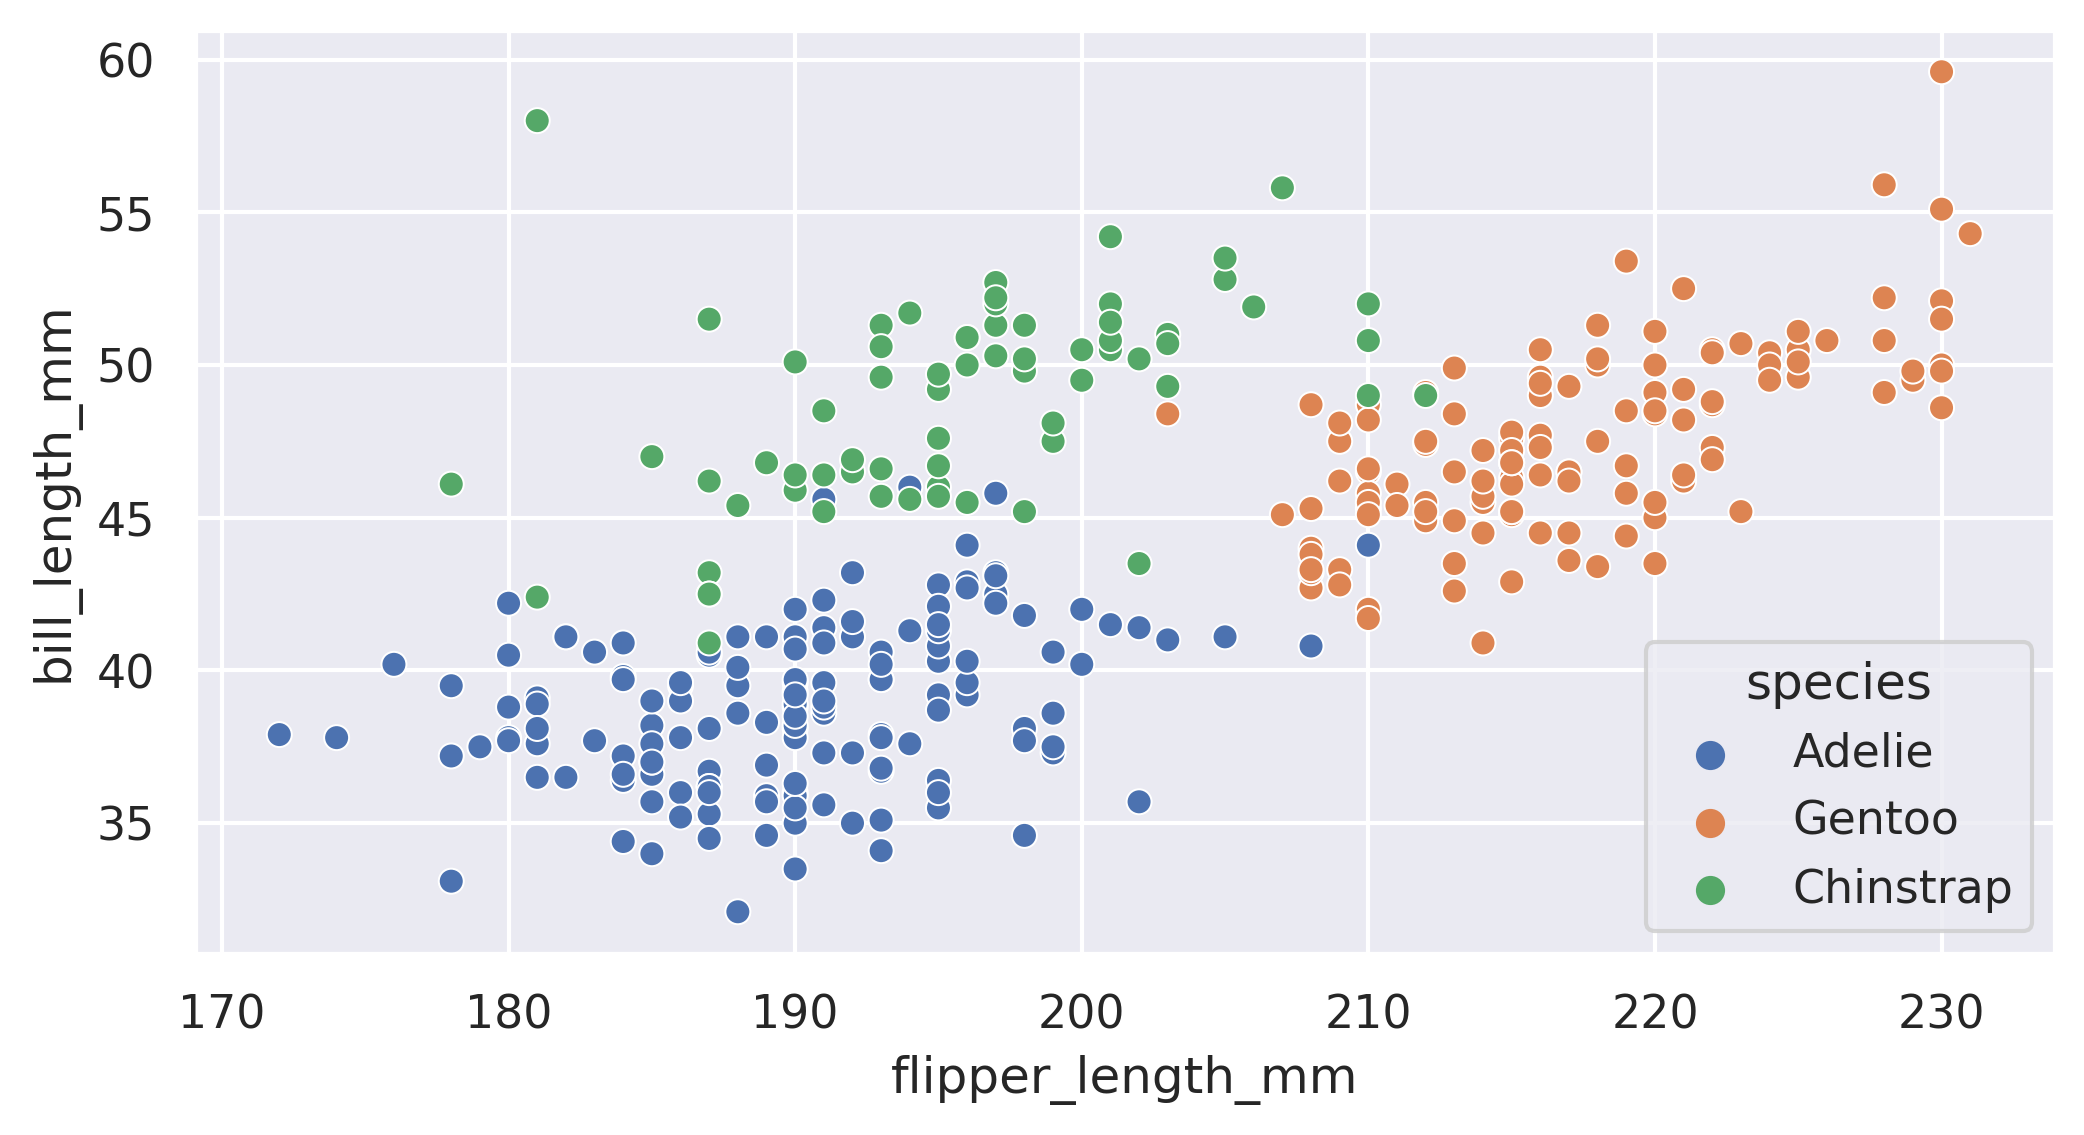

In [61]:
# Create a plot to explore the following question:
# How does the relation between flipper and bill length change among different penguin species.
import seaborn as sns
# these parameters should control the figure display
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300, 'figure.figsize':(8,4)})
sns.scatterplot(data = penguin_csv,
                x = "flipper_length_mm",
                y = "bill_length_mm",
                hue = "species")

## Further resources

### Other libraries

We have only scratched the surface of all the available tools for Scientific computing in Python. Learning to use them proficiently will take some time, but will payoff greatly as it will allow you to explore your research questions efficiently.

Here is a list of libraries that we might use in future labs:

* Machine Learning: [Scikit-Learn](https://scikit-learn.org/stable/), [Pytorch](https://pytorch.org/docs/stable/index.html)
* Image Manipulation: [Pillow](https://pillow.readthedocs.io/en/stable/), [Scikit-Image](https://scikit-image.org/), [Torchvision](https://pytorch.org/vision/stable/index.html).
* Audio: [Librosa](https://librosa.org/doc/latest/index.html), [Torchaudio](https://pytorch.org/audio/).
* Statistics: [Statsmodels](https://www.statsmodels.org/stable/index.html), [PyStan](https://pystan.readthedocs.io/en/latest/) and [PyMC3](https://docs.pymc.io/en/v3/index.html)
* Geospatial: [Geopandas](https://geopandas.org/en/stable/), [Shapely](https://shapely.readthedocs.io/en/stable/manual.html)

This is a [curated list](https://github.com/rossant/awesome-scientific-python#parallel-computing) of Python libraries for Scientific computing.